# Animal Shelter Color Bias - Data Visualizations

This notebook creates professional visualizations to support the statistical analysis of color bias in animal shelter adoptions. All figures are saved to the results/figures directory with consistent styling and high resolution.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set consistent style and color palette
plt.style.use('default')
sns.set_palette("Set2")

# Create results directory if it doesn't exist
Path('../results/figures').mkdir(parents=True, exist_ok=True)

# Consistent color scheme
CAT_COLOR = '#2E8B57'  # Sea green
DOG_COLOR = '#4682B4'  # Steel blue
BLACK_COLOR = '#2F2F2F'  # Dark gray
NONBLACK_COLOR = '#87CEEB'  # Sky blue

print("Libraries loaded and styling configured")

Libraries loaded and styling configured


In [17]:
# Load cleaned data
cat_df = pd.read_csv('../data/processed/data_cats.csv')
dog_df = pd.read_csv('../data/processed/data_dogs.csv')

# Add age in years for both datasets
cat_df['Age_Years'] = cat_df['Age (Months)'] / 12
dog_df['Age_Years'] = dog_df['Age (Months)'] / 12

# Add color groupings
dark_colors = ['Black', 'Brown', 'Chocolate', 'Brindle', 'Dark Brown', 'Grey']
cat_df['is_dark'] = cat_df['Primary Color'].isin(dark_colors)
dog_df['is_dark'] = dog_df['Primary Color'].isin(dark_colors)

print(f"Data loaded: {len(cat_df):,} cats, {len(dog_df):,} dogs")
print(f"Cats - Black: {(cat_df['Primary Color'] == 'Black').sum():,}, Non-black: {(cat_df['Primary Color'] != 'Black').sum():,}")
print(f"Dogs - Black: {(dog_df['Primary Color'] == 'Black').sum():,}, Non-black: {(dog_df['Primary Color'] != 'Black').sum():,}")

Data loaded: 16,901 cats, 10,726 dogs
Cats - Black: 5,767, Non-black: 11,134
Dogs - Black: 2,920, Non-black: 7,806


## 1. Adoption Rates by Color Group

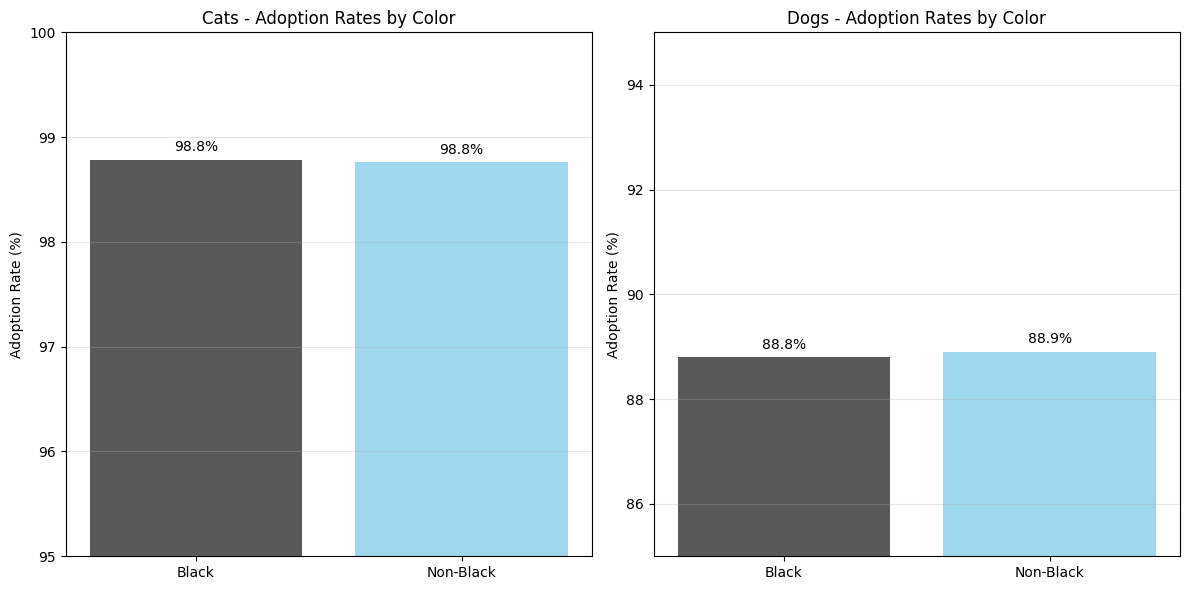

In [18]:
# Calculate adoption rates
def calculate_adoption_rates(df, species_name):
    total = len(df)
    adopted = (df['Outcome Type'] == 'Adoption').sum()
    
    black_total = (df['Primary Color'] == 'Black').sum()
    black_adopted = ((df['Primary Color'] == 'Black') & (df['Outcome Type'] == 'Adoption')).sum()
    
    nonblack_total = (df['Primary Color'] != 'Black').sum()
    nonblack_adopted = ((df['Primary Color'] != 'Black') & (df['Outcome Type'] == 'Adoption')).sum()
    
    return {
        'Species': species_name,
        'Black_Rate': (black_adopted / black_total) * 100 if black_total > 0 else 0,
        'NonBlack_Rate': (nonblack_adopted / nonblack_total) * 100 if nonblack_total > 0 else 0,
        'Overall_Rate': (adopted / total) * 100
    }

cat_rates = calculate_adoption_rates(cat_df, 'Cats')
dog_rates = calculate_adoption_rates(dog_df, 'Dogs')

# Create adoption rates bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Cats
categories = ['Black', 'Non-Black']
cat_values = [cat_rates['Black_Rate'], cat_rates['NonBlack_Rate']]
bars1 = ax1.bar(categories, cat_values, color=[BLACK_COLOR, NONBLACK_COLOR], alpha=0.8)
ax1.set_ylim(95, 100)
ax1.set_ylabel('Adoption Rate (%)')
ax1.set_title('Cats - Adoption Rates by Color')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars1, cat_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.1f}%', ha='center', va='bottom')

# Dogs
dog_values = [dog_rates['Black_Rate'], dog_rates['NonBlack_Rate']]
bars2 = ax2.bar(categories, dog_values, color=[BLACK_COLOR, NONBLACK_COLOR], alpha=0.8)
ax2.set_ylim(85, 95)
ax2.set_ylabel('Adoption Rate (%)')
ax2.set_title('Dogs - Adoption Rates by Color')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars2, dog_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../results/figures/adoption_rates_by_color.png', dpi=300, bbox_inches='tight')
plt.show()

These adoption rates show minimal differences between black and non-black animals for both species, with over 98% adoption rates for cats and nearly 89% for dogs regardless of color.

## 2. Length of Stay Box Plots

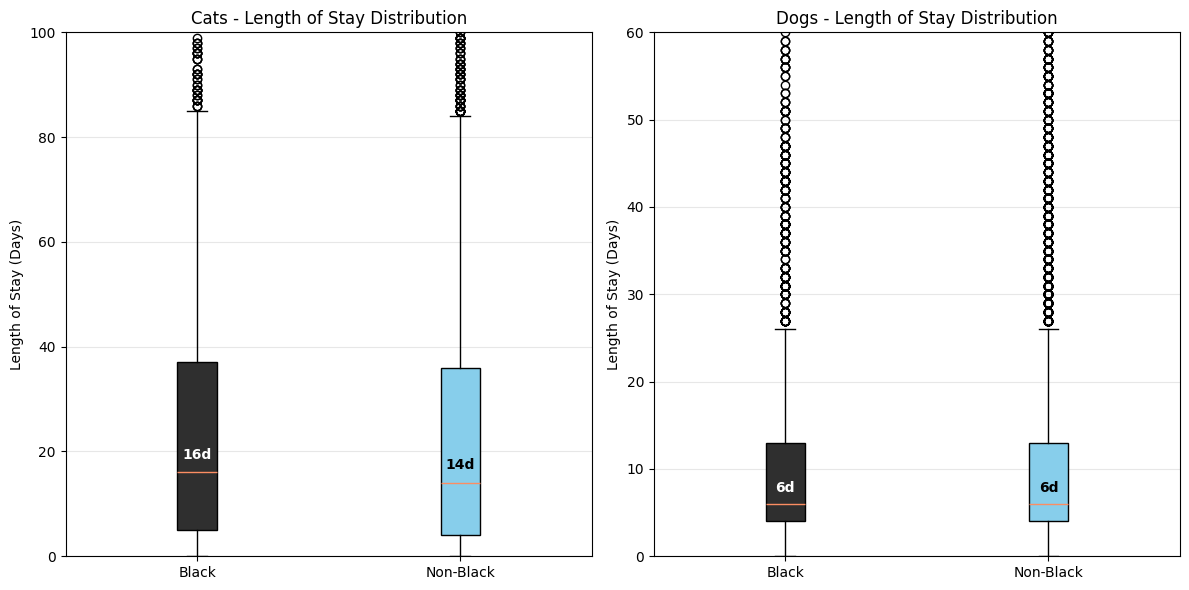

In [19]:
# Create length of stay comparison box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Prepare data for cats
cat_adopted = cat_df[cat_df['Outcome Type'] == 'Adoption']
cat_black_los = cat_adopted[cat_adopted['Primary Color'] == 'Black']['length_of_stay']
cat_nonblack_los = cat_adopted[cat_adopted['Primary Color'] != 'Black']['length_of_stay']

# Cats box plot
box_data_cats = [cat_black_los, cat_nonblack_los]
bp1 = ax1.boxplot(box_data_cats, patch_artist=True, labels=['Black', 'Non-Black'])
bp1['boxes'][0].set_facecolor(BLACK_COLOR)
bp1['boxes'][1].set_facecolor(NONBLACK_COLOR)

ax1.set_ylabel('Length of Stay (Days)')
ax1.set_title('Cats - Length of Stay Distribution')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 100)  # Limit y-axis to show main distribution

# Add median labels
medians_cats = [np.median(cat_black_los), np.median(cat_nonblack_los)]
text_colors = ['white', 'black']  # White text on black boxes, black text on light boxes
for i, median in enumerate(medians_cats):
    ax1.text(i+1, median + 2, f'{median:.0f}d', ha='center', va='bottom', 
             fontweight='bold', color=text_colors[i])

# Prepare data for dogs
dog_adopted = dog_df[dog_df['Outcome Type'] == 'Adoption']
dog_black_los = dog_adopted[dog_adopted['Primary Color'] == 'Black']['length_of_stay']
dog_nonblack_los = dog_adopted[dog_adopted['Primary Color'] != 'Black']['length_of_stay']

# Dogs box plot
box_data_dogs = [dog_black_los, dog_nonblack_los]
bp2 = ax2.boxplot(box_data_dogs, patch_artist=True, labels=['Black', 'Non-Black'])
bp2['boxes'][0].set_facecolor(BLACK_COLOR)
bp2['boxes'][1].set_facecolor(NONBLACK_COLOR)

ax2.set_ylabel('Length of Stay (Days)')
ax2.set_title('Dogs - Length of Stay Distribution')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 60)  # Limit y-axis to show main distribution

# Add median labels
medians_dogs = [np.median(dog_black_los), np.median(dog_nonblack_los)]
text_colors = ['white', 'black']  # White text on black boxes, black text on light boxes
for i, median in enumerate(medians_dogs):
    ax2.text(i+1, median + 1, f'{median:.0f}d', ha='center', va='bottom', 
             fontweight='bold', color=text_colors[i])

plt.tight_layout()
plt.savefig('../results/figures/length_of_stay_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

While adoption rates are similar, black cats show a slightly longer median length of stay (16 days vs 14 days), whereas dogs show no meaningful difference (6 days for both groups).

## 3. Color Distribution

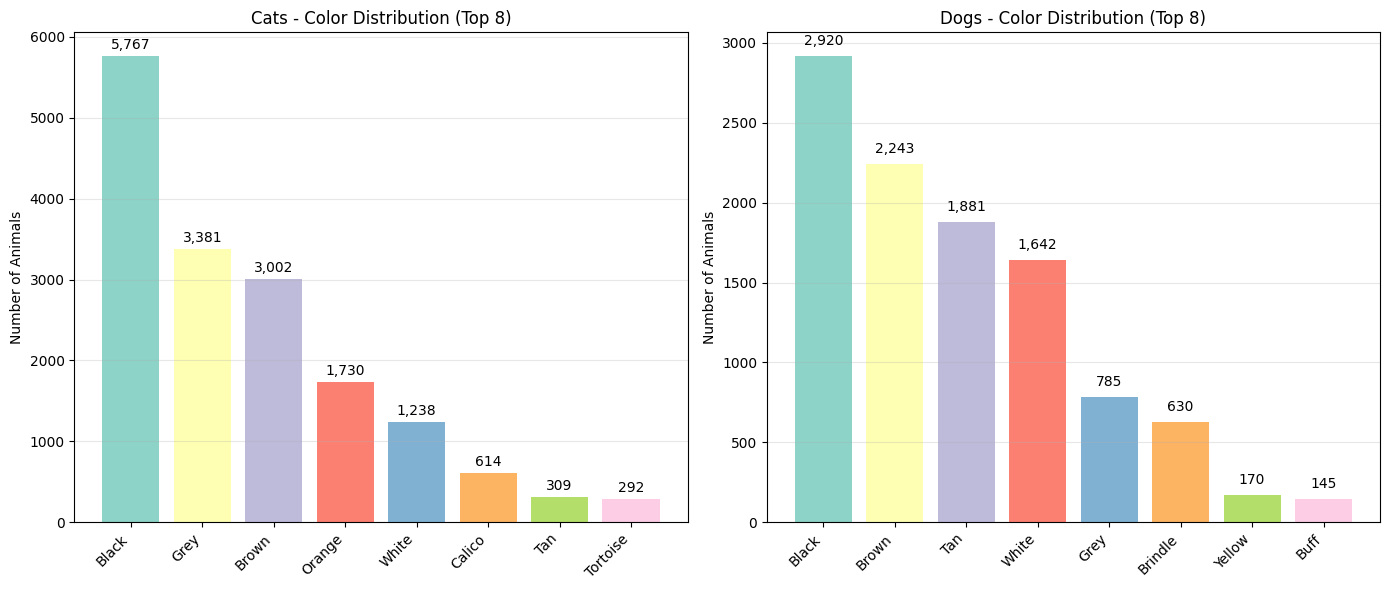

In [20]:
# Color distribution for both species
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Top 8 cat colors
cat_colors = cat_df['Primary Color'].value_counts().head(8)
colors_palette = sns.color_palette("Set3", len(cat_colors))
bars1 = ax1.bar(range(len(cat_colors)), cat_colors.values, color=colors_palette)
ax1.set_xticks(range(len(cat_colors)))
ax1.set_xticklabels(cat_colors.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Animals')
ax1.set_title('Cats - Color Distribution (Top 8)')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars1, cat_colors.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{value:,}', ha='center', va='bottom', rotation=0)

# Top 8 dog colors
dog_colors = dog_df['Primary Color'].value_counts().head(8)
bars2 = ax2.bar(range(len(dog_colors)), dog_colors.values, color=colors_palette)
ax2.set_xticks(range(len(dog_colors)))
ax2.set_xticklabels(dog_colors.index, rotation=45, ha='right')
ax2.set_ylabel('Number of Animals')
ax2.set_title('Dogs - Color Distribution (Top 8)')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars2, dog_colors.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{value:,}', ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.savefig('../results/figures/color_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Black is the most common color for both species, representing 34% of cats (5,767) and 27% of dogs (2,920), providing sufficient sample sizes for statistical comparisons.

## 4. Age Distribution and Outcomes

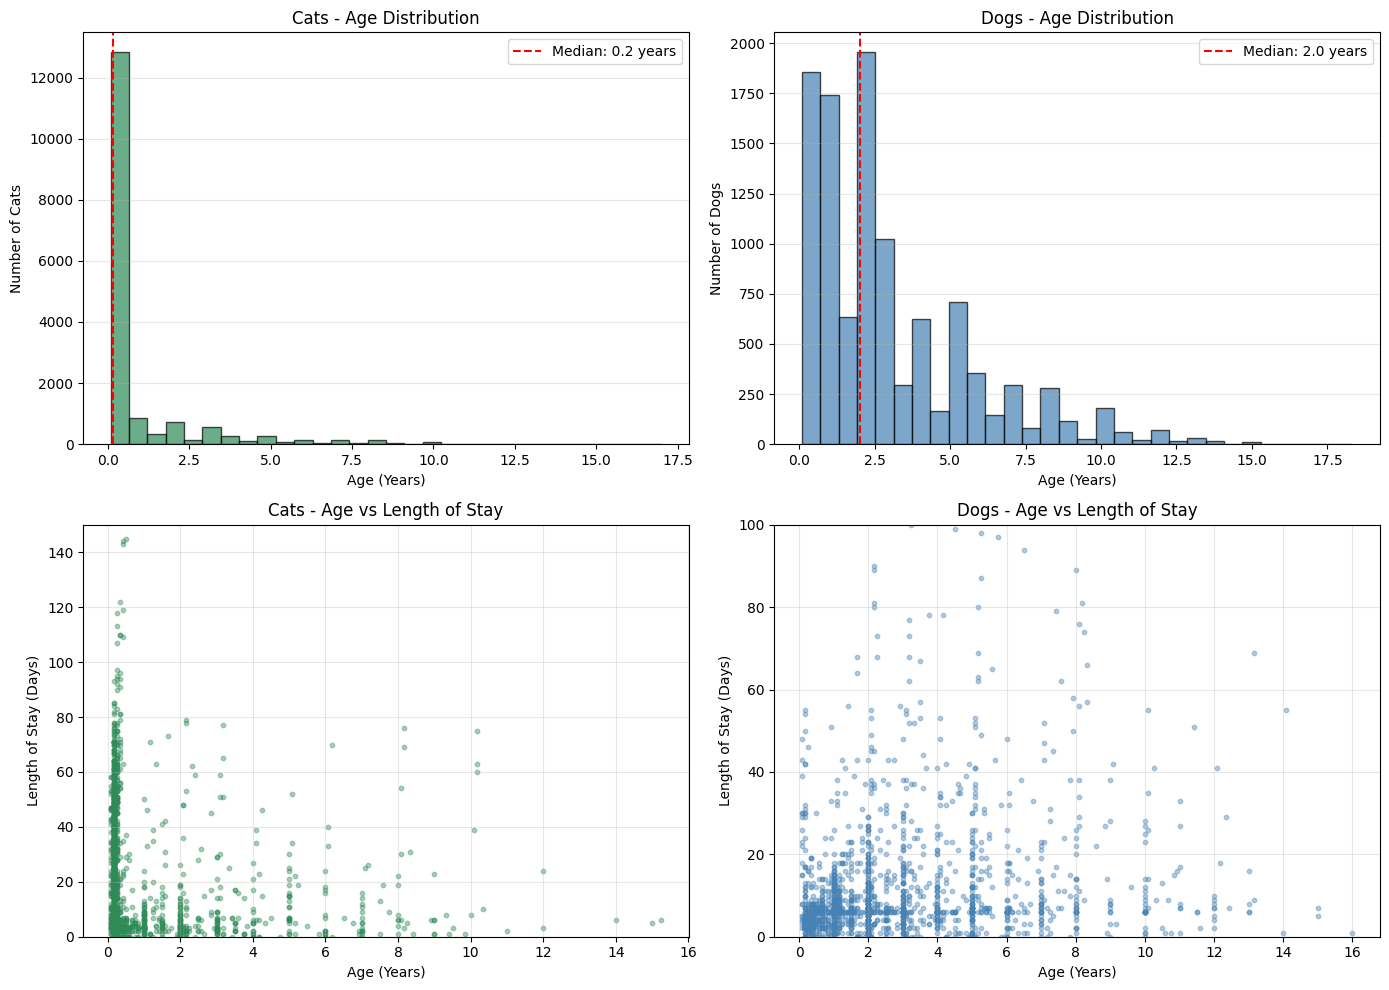

In [21]:
# Age distribution histograms
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Cat age distribution
ax1.hist(cat_df['Age_Years'], bins=30, color=CAT_COLOR, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Age (Years)')
ax1.set_ylabel('Number of Cats')
ax1.set_title('Cats - Age Distribution')
ax1.grid(axis='y', alpha=0.3)
ax1.axvline(cat_df['Age_Years'].median(), color='red', linestyle='--', 
           label=f'Median: {cat_df["Age_Years"].median():.1f} years')
ax1.legend()

# Dog age distribution
ax2.hist(dog_df['Age_Years'], bins=30, color=DOG_COLOR, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Age (Years)')
ax2.set_ylabel('Number of Dogs')
ax2.set_title('Dogs - Age Distribution')
ax2.grid(axis='y', alpha=0.3)
ax2.axvline(dog_df['Age_Years'].median(), color='red', linestyle='--', 
           label=f'Median: {dog_df["Age_Years"].median():.1f} years')
ax2.legend()

# Age vs Length of Stay scatter (cats)
cat_adopted_sample = cat_adopted.sample(n=min(2000, len(cat_adopted)), random_state=42)
ax3.scatter(cat_adopted_sample['Age_Years'], cat_adopted_sample['length_of_stay'], 
           alpha=0.4, color=CAT_COLOR, s=10)
ax3.set_xlabel('Age (Years)')
ax3.set_ylabel('Length of Stay (Days)')
ax3.set_title('Cats - Age vs Length of Stay')
ax3.grid(alpha=0.3)
ax3.set_ylim(0, 150)

# Age vs Length of Stay scatter (dogs)
dog_adopted_sample = dog_adopted.sample(n=min(2000, len(dog_adopted)), random_state=42)
ax4.scatter(dog_adopted_sample['Age_Years'], dog_adopted_sample['length_of_stay'], 
           alpha=0.4, color=DOG_COLOR, s=10)
ax4.set_xlabel('Age (Years)')
ax4.set_ylabel('Length of Stay (Days)')
ax4.set_title('Dogs - Age vs Length of Stay')
ax4.grid(alpha=0.3)
ax4.set_ylim(0, 100)

plt.tight_layout()
plt.savefig('../results/figures/age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Both species show young populations (median 0.2 years for cats, 2.0 years for dogs) with no clear relationship between age and length of stay, indicating color effects are independent of age factors.

## 5. Intake and Outcome Types

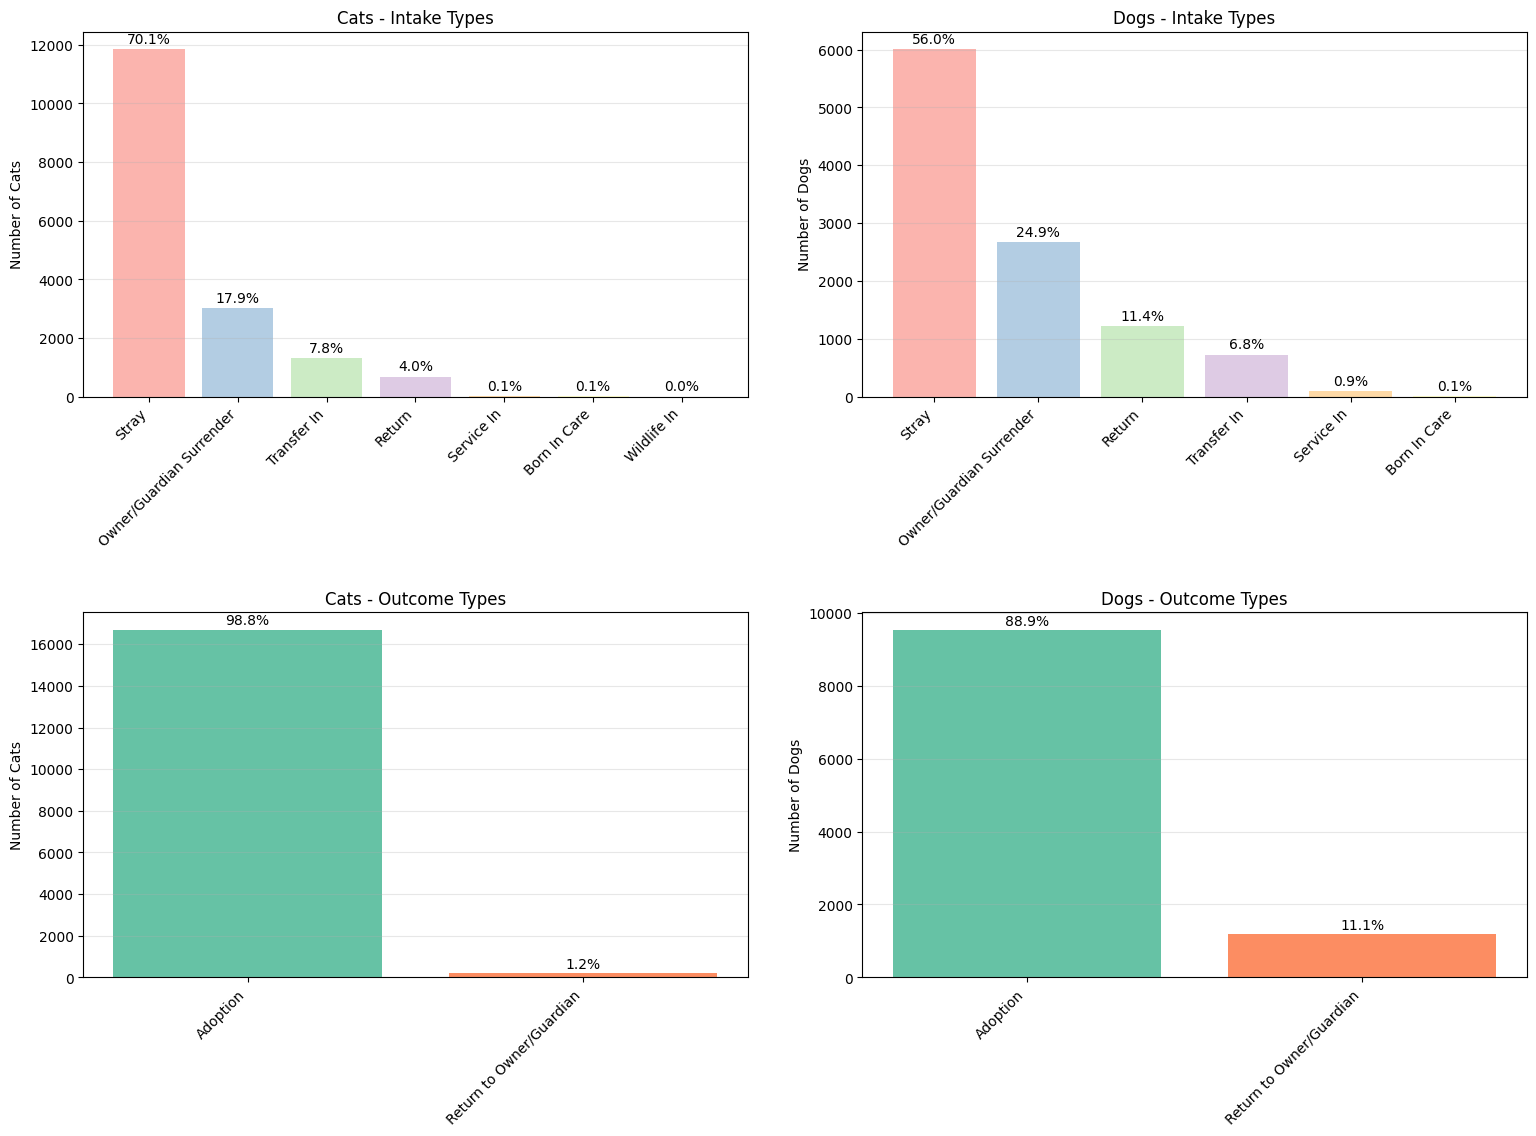

In [22]:
# Intake and outcome distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Cat intake types
cat_intake = cat_df['Intake Type'].value_counts()
colors_intake = sns.color_palette("Pastel1", len(cat_intake))
bars1 = ax1.bar(range(len(cat_intake)), cat_intake.values, color=colors_intake)
ax1.set_xticks(range(len(cat_intake)))
ax1.set_xticklabels(cat_intake.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Cats')
ax1.set_title('Cats - Intake Types')
ax1.grid(axis='y', alpha=0.3)

# Add percentages
total_cats = len(cat_df)
for bar, value in zip(bars1, cat_intake.values):
    pct = (value / total_cats) * 100
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', ha='center', va='bottom')

# Dog intake types
dog_intake = dog_df['Intake Type'].value_counts()
bars2 = ax2.bar(range(len(dog_intake)), dog_intake.values, color=colors_intake)
ax2.set_xticks(range(len(dog_intake)))
ax2.set_xticklabels(dog_intake.index, rotation=45, ha='right')
ax2.set_ylabel('Number of Dogs')
ax2.set_title('Dogs - Intake Types')
ax2.grid(axis='y', alpha=0.3)

# Add percentages
total_dogs = len(dog_df)
for bar, value in zip(bars2, dog_intake.values):
    pct = (value / total_dogs) * 100
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{pct:.1f}%', ha='center', va='bottom')

# Cat outcome types
cat_outcome = cat_df['Outcome Type'].value_counts()
colors_outcome = sns.color_palette("Set2", len(cat_outcome))
bars3 = ax3.bar(range(len(cat_outcome)), cat_outcome.values, color=colors_outcome)
ax3.set_xticks(range(len(cat_outcome)))
ax3.set_xticklabels(cat_outcome.index, rotation=45, ha='right')
ax3.set_ylabel('Number of Cats')
ax3.set_title('Cats - Outcome Types')
ax3.grid(axis='y', alpha=0.3)

# Add percentages
for bar, value in zip(bars3, cat_outcome.values):
    pct = (value / total_cats) * 100
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{pct:.1f}%', ha='center', va='bottom')

# Dog outcome types
dog_outcome = dog_df['Outcome Type'].value_counts()
bars4 = ax4.bar(range(len(dog_outcome)), dog_outcome.values, color=colors_outcome)
ax4.set_xticks(range(len(dog_outcome)))
ax4.set_xticklabels(dog_outcome.index, rotation=45, ha='right')
ax4.set_ylabel('Number of Dogs')
ax4.set_title('Dogs - Outcome Types')
ax4.grid(axis='y', alpha=0.3)

# Add percentages
for bar, value in zip(bars4, dog_outcome.values):
    pct = (value / total_dogs) * 100
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout(pad=3.0)  # Add more padding between subplots
plt.savefig('../results/figures/intake_outcome_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Most animals arrive as strays (70% cats, 56% dogs) with overwhelmingly positive outcomes - nearly 99% of cats and 89% of dogs are adopted, demonstrating the shelter's effectiveness regardless of intake circumstances.

## 6. Summary Statistics Dashboard

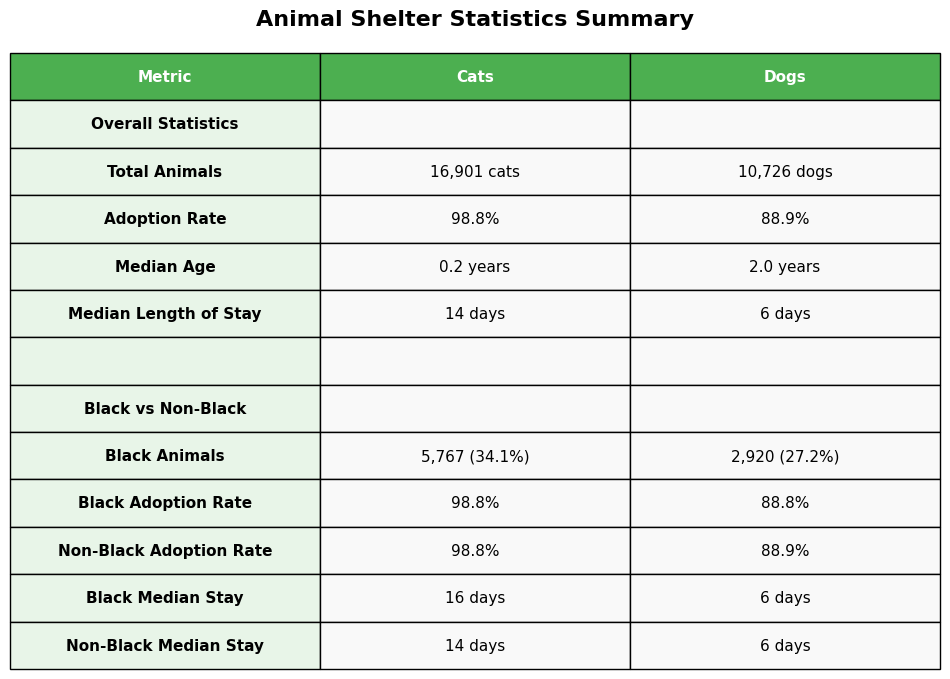

In [23]:
# Create summary statistics table visualization
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Calculate summary statistics
summary_data = []

# Overall statistics
summary_data.append(['Overall Statistics', '', ''])
summary_data.append(['Total Animals', f'{len(cat_df):,} cats', f'{len(dog_df):,} dogs'])
summary_data.append(['Adoption Rate', f'{cat_rates["Overall_Rate"]:.1f}%', f'{dog_rates["Overall_Rate"]:.1f}%'])
summary_data.append(['Median Age', f'{cat_df["Age_Years"].median():.1f} years', f'{dog_df["Age_Years"].median():.1f} years'])
summary_data.append(['Median Length of Stay', f'{cat_adopted["length_of_stay"].median():.0f} days', f'{dog_adopted["length_of_stay"].median():.0f} days'])

summary_data.append(['', '', ''])
summary_data.append(['Black vs Non-Black', '', ''])
summary_data.append(['Black Animals', f'{(cat_df["Primary Color"] == "Black").sum():,} ({(cat_df["Primary Color"] == "Black").mean()*100:.1f}%)', 
                     f'{(dog_df["Primary Color"] == "Black").sum():,} ({(dog_df["Primary Color"] == "Black").mean()*100:.1f}%)'])
summary_data.append(['Black Adoption Rate', f'{cat_rates["Black_Rate"]:.1f}%', f'{dog_rates["Black_Rate"]:.1f}%'])
summary_data.append(['Non-Black Adoption Rate', f'{cat_rates["NonBlack_Rate"]:.1f}%', f'{dog_rates["NonBlack_Rate"]:.1f}%'])
summary_data.append(['Black Median Stay', f'{cat_black_los.median():.0f} days', f'{dog_black_los.median():.0f} days'])
summary_data.append(['Non-Black Median Stay', f'{cat_nonblack_los.median():.0f} days', f'{dog_nonblack_los.median():.0f} days'])

# Create table
table = ax.table(cellText=summary_data, 
                colLabels=['Metric', 'Cats', 'Dogs'],
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Style the table
for i in range(len(summary_data) + 1):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        elif j == 0:  # First column
            cell.set_facecolor('#E8F5E8')
            cell.set_text_props(weight='bold')
        else:
            cell.set_facecolor('#F9F9F9')

plt.title('Animal Shelter Statistics Summary', fontsize=16, fontweight='bold', pad=20)
plt.savefig('../results/figures/summary_statistics.png', dpi=300, bbox_inches='tight')
plt.show()